In [135]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys

images = ['chess', 'brick', 'granite', 'grass', 'water', 'sky']
names = { 
  'chess': 'Xadrez',
  'brick': 'Tijolos',
  'granite': 'Granito',
  'grass': "Grama",
  'water': 'Água',
  'sky': 'Céu'
}

In [138]:
# aptidao

for img in images:
  x=[]
  yMin=[]
  yMax=[]
  yAvg=[]

  for i in range(0, 2):
    with open('results/' + img + str(i) + '.csv', 'r') as csvfile:
        plots= csv.reader(csvfile, delimiter=',')

        x = []
        yMinAux = []
        yMaxAux = []
        yAvgAux = []
        for row in plots:
            x.append(int(row[0]))
            yMinAux.append(float(row[1]))
            yMaxAux.append(float(row[2]))
            yAvgAux.append(float(row[3]))

        yMin.append(yMinAux)
        yMax.append(yMaxAux)
        yAvg.append(yAvgAux)


  plt.figure()
  # plt.plot(x, yMin[0], yMin[1], 'k--', color='blue')
  plt.plot(x, yMax[0], yMax[1], 'k--', color='red')
  plt.plot(x, yAvg[0], yAvg[1], 'k--', color='blue')

  plt.title('Aptidão x Geração (' + names[img] + ')')

  plt.xlabel('Geração')
  plt.ylabel('Aptidão')

  plt.legend(['Aptidão máxima (1º teste)', 'Aptidão máxima (2º teste)', 'Aptidão média (1º teste)', 'Aptidão média (2º teste)'], loc=4)
  
  plt.savefig('results/graph' + img + '.pdf')
#   plt.show()
  plt.clf()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [139]:
# tempo

for img in images:
  x=[]
  t=[]

  with open('results/' + img + str(i) + '.csv', 'r') as csvfile:
      plots= csv.reader(csvfile, delimiter=',')

      for row in plots:
          x.append(int(row[0]))
          t.append(float(row[5])/60)
          
  plt.figure()
  plt.plot(x, t, color='red')

  plt.title('Duração x Geração (' + names[img] + ')')

  plt.xlabel('Geração')
  plt.ylabel('Duração(min)')
  
  plt.savefig('results/graph' + img + 'Time.pdf')
#   plt.show()
  plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[0.9273800000000001, 0.784, 0.781695, 0.614325, 0.9711650000000001, 0.74281]


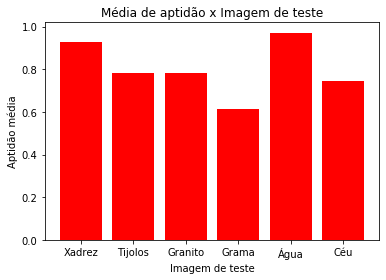

<Figure size 432x288 with 0 Axes>

In [140]:
# Media aptidao

x = []
f = []

for img in images:
  yMax=[]
  for i in range(0, 2):
    with open('results/' + img + str(i) + '.csv', 'r') as csvfile:
        plots= csv.reader(csvfile, delimiter=',')
        yMaxAux = []
        
        for row in plots:
            yMaxAux.append(float(row[2]))

        yMax.append(yMaxAux)

  x.append(names[img])
  maxValues = [np.max(yMax[0]), np.max(yMax[1])]
  f.append(np.average(maxValues))

print(f)
plt.figure()
# plt.plot(x, yMin[0], yMin[1], 'k--', color='blue')
plt.bar(x, f, color='red')

plt.title('Média de aptidão x Imagem de teste')

plt.xlabel('Imagem de teste')
plt.ylabel('Aptidão média')

plt.savefig('results/graphAptidaoAvg.pdf')
plt.show()
plt.clf()

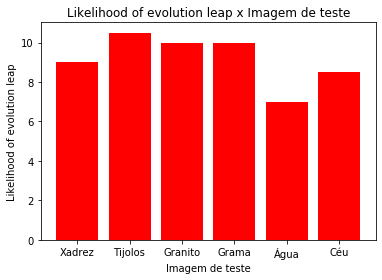

<Figure size 432x288 with 0 Axes>

In [141]:
# leaps

x = []
lel = []
for img in images:
  yMax=[]
  leaps = 0
  for i in range(0, 2):
    with open('results/' + img + str(i) + '.csv', 'r') as csvfile:
      plots= csv.reader(csvfile, delimiter=',')
      lastValue = sys.maxsize
      for row in plots:
        maxValue = float(row[2])
        if maxValue > lastValue:
          leaps += 1
        lastValue = maxValue

  x.append(names[img])
  lel.append(leaps / 2)

plt.figure()
plt.bar(x, lel, color='red')

plt.title('Likelihood of evolution leap x Imagem de teste')

plt.xlabel('Imagem de teste')
plt.ylabel('Likelihood of evolution leap')

plt.savefig('results/graphLel.pdf')
plt.show()
plt.clf()